In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset_dir= r"C:\Users\Dhanush\Downloads\archive\TrashType_Image_Dataset"
image_size = (224, 224)
batch_size = 32
seed = 42

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,  # ✅ Update this path to your dataset
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,  # ✅ Update this path to your validation data
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int"
)

class_names = train_ds.class_names


Found 2527 files belonging to 6 classes.
Found 2527 files belonging to 6 classes.


In [5]:
def preprocess(image, label):
    image = preprocess_input(image)
    return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)


In [6]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [8]:
base_model = MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)
base_model.trainable = False  # Set to True if fine-tuning is needed


In [9]:
model = Sequential([
    layers.Input(shape=(224, 224, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')  # Adjusted to your classes
])


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
early = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # You can go longer; early stopping will stop it if needed
    callbacks=[early]  # Add here
)



Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.9256 - loss: 0.2194 - val_accuracy: 0.9683 - val_loss: 0.1349
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9348 - loss: 0.2000 - val_accuracy: 0.9656 - val_loss: 0.1317
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9285 - loss: 0.2146 - val_accuracy: 0.9683 - val_loss: 0.1285
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.9325 - loss: 0.1948 - val_accuracy: 0.9672 - val_loss: 0.1229
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9316 - loss: 0.1898 - val_accuracy: 0.9770 - val_loss: 0.1095
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9282 - loss: 0.1921 - val_accuracy: 0.9751 - val_loss: 0.1089
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9417 - loss: 0.1702 - val_accuracy: 0.9810 - val_loss: 0.0966
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9424 - loss: 0.1658 - val_accuracy: 0.9818 - v

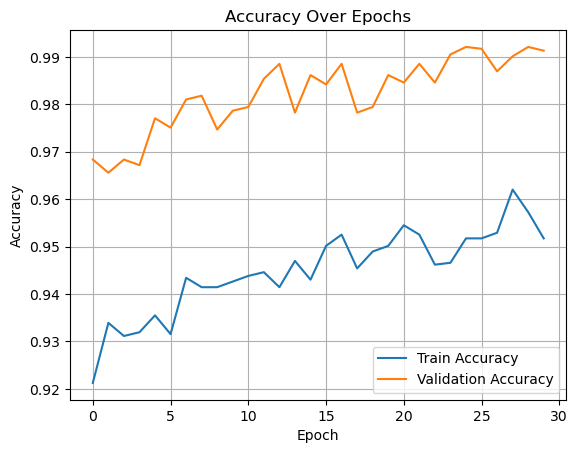

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [15]:
model.save("my_model.keras") 
model = tf.keras.models.load_model('Effiicientnetv2b2.keras')


In [2]:
!pip install gradio

In [3]:
def classify_image(img):  
    img = img.resize((124, 124))  
    img_array = np.array(img, dtype=np.float32)  
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  
    prediction = model.predict(img_array)  
    predicted_class_index = np.argmax(prediction)  
    predicted_class_name = class_names[predicted_class_index]  
    confidence = prediction[0][predicted_class_index]  
    return f"Predicted: {predicted_class_name} (Confidence: {confidence:.2f})"  

In [ ]:
iface = gr.Interface(  
    fn=classify_image,  
    inputs=gr.Image(type="pil"),
    outputs="text" 
)  

 
iface.launch() 